In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
results_full = pd.read_csv(
    "../hparam_results/cnn2_mnist_lr_optim_20221019/results_cnn2_mnist_lr_optim_20221019.csv",
    index_col=0)

results_tenth = pd.read_csv(
    "../hparam_results/cnn2_mnist_lr_tenth_optim_20221019/results_cnn2_mnist_lr_tenth_optim_20221019.csv",
    index_col=0)

best_lr_full = results_full.sort_values(by='val_loss', ascending=True)
best_lr_tenth = results_tenth.sort_values(by='val_loss', ascending=True)

best_lr_full_val = best_lr_full['config/optimizer_cfg/args/lr'].values[0]
best_lr_tenth_val = best_lr_tenth['config/optimizer_cfg/args/lr'].values[0]

best_lr_full_loss = best_lr_full['val_loss'].values[0]
best_lr_tenth_loss = best_lr_tenth['val_loss'].values[0]
print(f"best lr (full dataset): {best_lr_full_val}, loss: {best_lr_full_loss}")
print(f"best lr (1/10 dataset): {best_lr_tenth_val}, loss: {best_lr_tenth_loss}")

best lr (full dataset): 0.001605632328165, loss: 0.0059941853396594
best lr (1/10 dataset): 0.0129528276152004, loss: 0.0101235173642635


Text(0.5, 1.0, 'optimal learning rate after training for 10 epochs on full dataset')

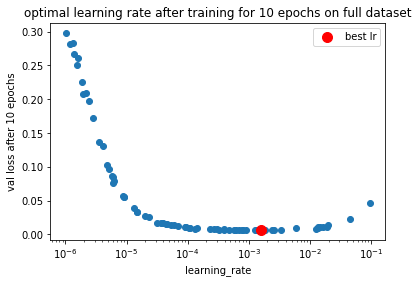

In [62]:
fig, ax = plt.subplots()

results_full_ten_epoch = results_full[results_full['training_iteration']==10]
ax.scatter(results_full_ten_epoch['config/optimizer_cfg/args/lr'],
            results_full_ten_epoch['val_loss'])
ax.scatter(best_lr_full_val, best_lr_full_loss, c='r', s=100, label='best lr')
ax.legend()
ax.set_xscale('log')
ax.set_xlabel("learning_rate")
ax.set_ylabel("val loss after 10 epochs")
ax.set_title("optimal learning rate after training for 10 epochs on full dataset")

Text(0.5, 1.0, 'optimal learning rate after training for 10 epochs on 1/10th of dataset')

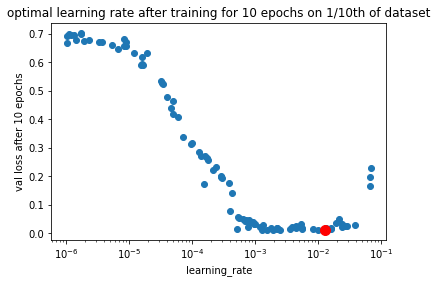

In [63]:
fig, ax = plt.subplots()

results_tenth_ten_epoch = results_tenth #results_tenth[results_tenth['training_iteration']==10]
ax.scatter(results_tenth_ten_epoch['config/optimizer_cfg/args/lr'],
            results_tenth_ten_epoch['val_loss'])
ax.scatter(best_lr_tenth_val, best_lr_tenth_loss, c='r', s=100, label='best lr')
ax.set_xscale('log')
ax.set_xlabel("learning_rate")
ax.set_ylabel("val loss after 10 epochs")
ax.set_title("optimal learning rate after training for 10 epochs on 1/10th of dataset")

Text(0.5, 1.0, 'optimal learning rate after training')

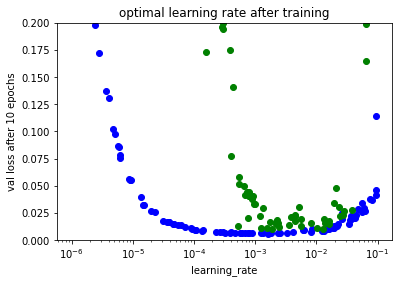

In [66]:
fig, ax = plt.subplots()

results_tenth_ten_epoch = results_tenth #results_tenth[results_tenth['training_iteration']==10]
ax.scatter(results_full['config/optimizer_cfg/args/lr'],
            results_full['val_loss'], c='b')
ax.scatter(results_tenth['config/optimizer_cfg/args/lr'],
            results_tenth['val_loss'], c='g')
# ax.scatter(best_lr_tenth_val, best_lr_tenth_loss, c='r', s=100, label='best lr')
ax.set_xscale('log')
ax.set_xlabel("learning_rate")
ax.set_ylabel("val loss after 10 epochs")
ax.set_ylim([0, 0.2])
ax.set_title("optimal learning rate after training")